# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('dark_background')

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)

train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [5]:
train_data.shape

(59966, 14)

## 3. Data preprocessing and visualization

### 3.1 Convert LoS to binary targets

In [6]:
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

### 3.2 Deep inspection to consider anomaly data point(s)

In [7]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

### 3.3 Plot the attributes of class 0 and 1

In [8]:
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

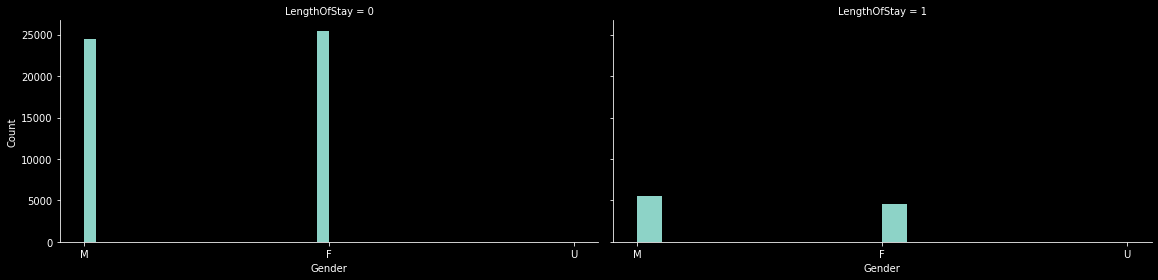

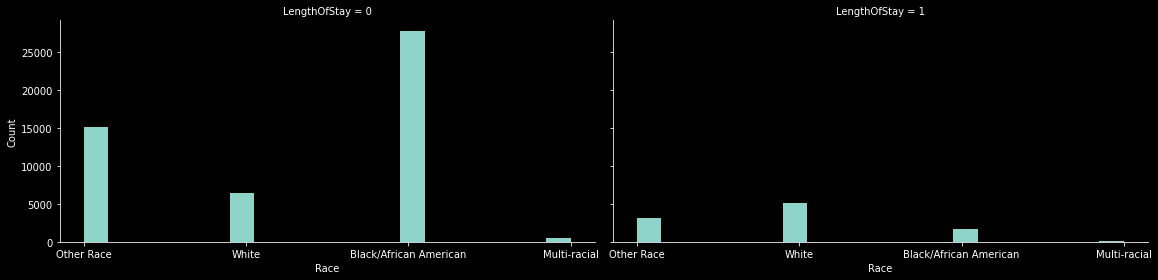

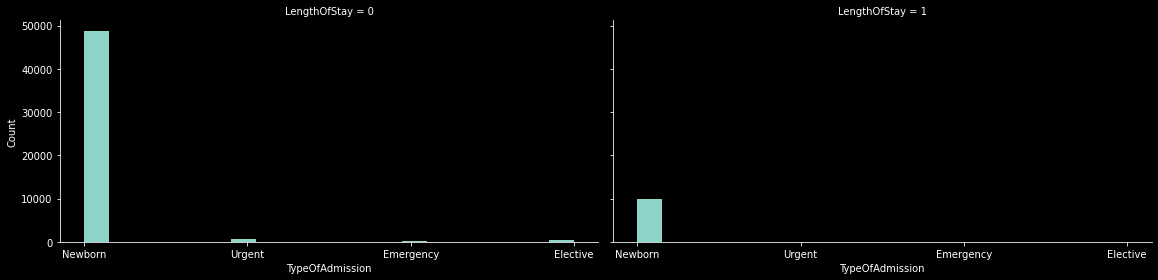

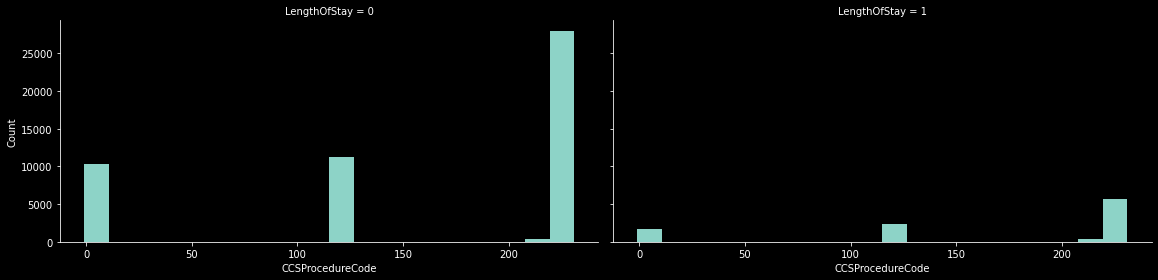

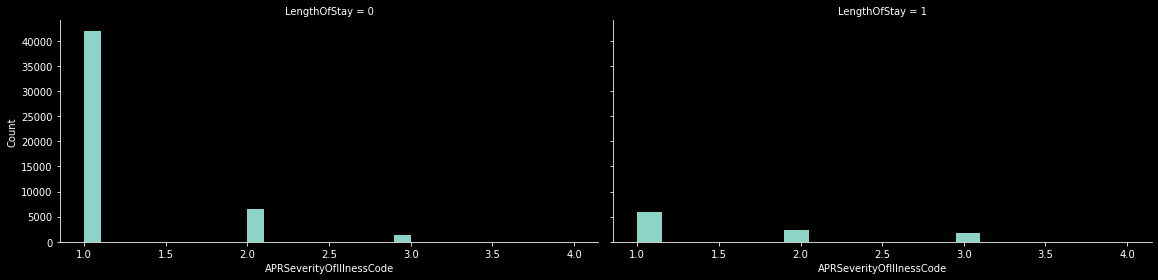

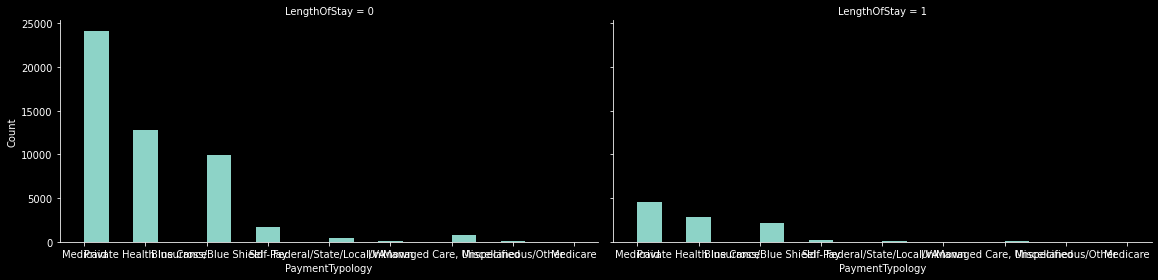

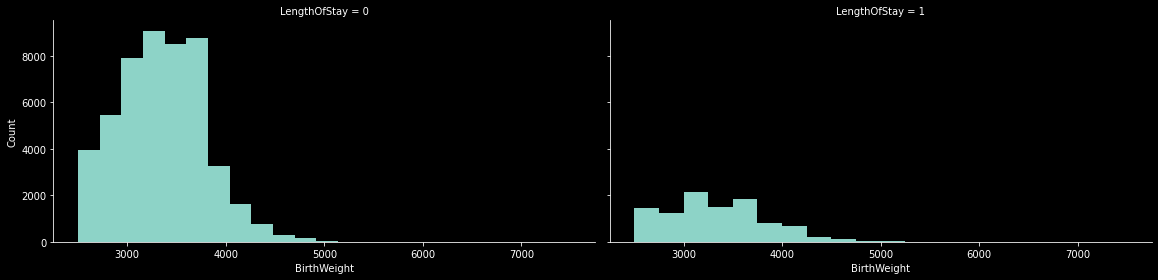

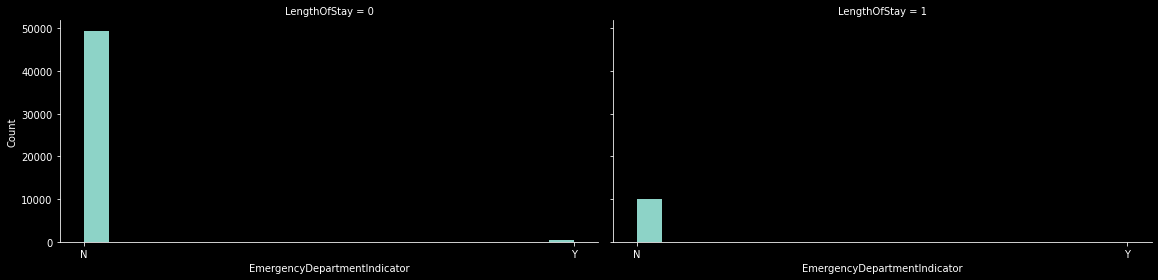

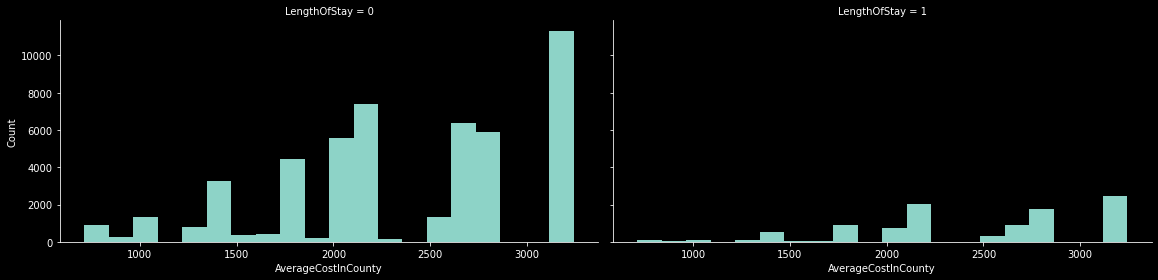

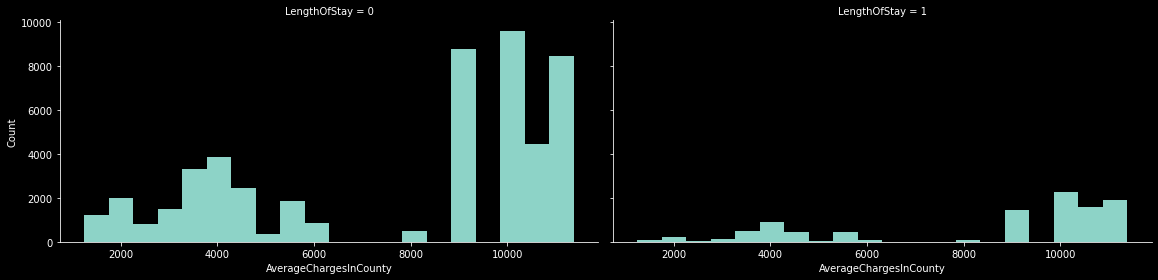

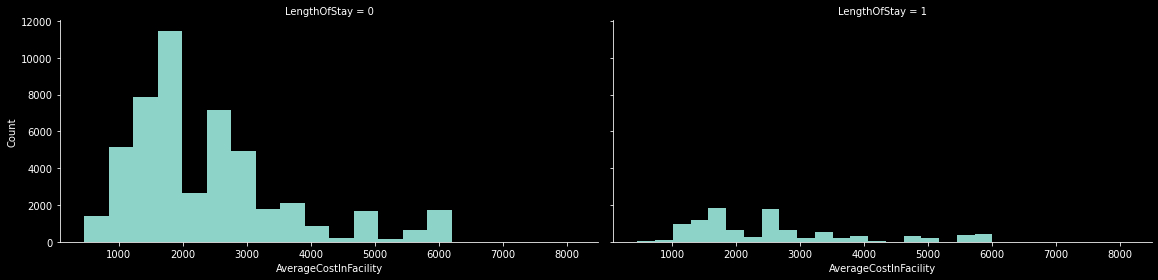

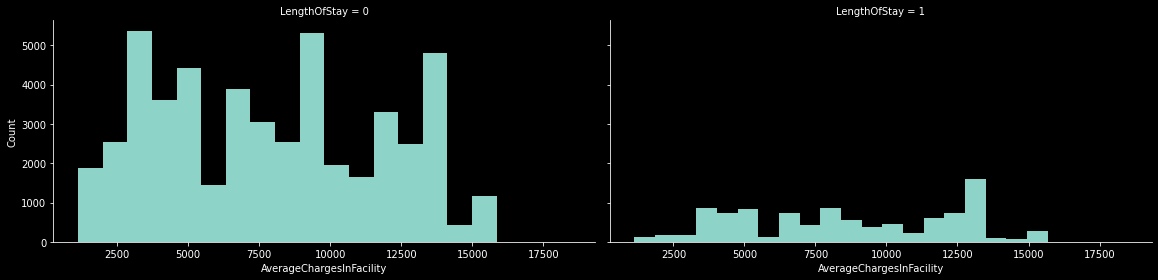

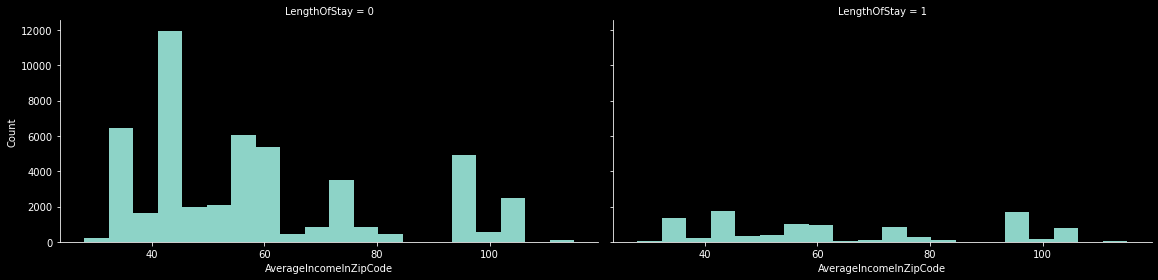

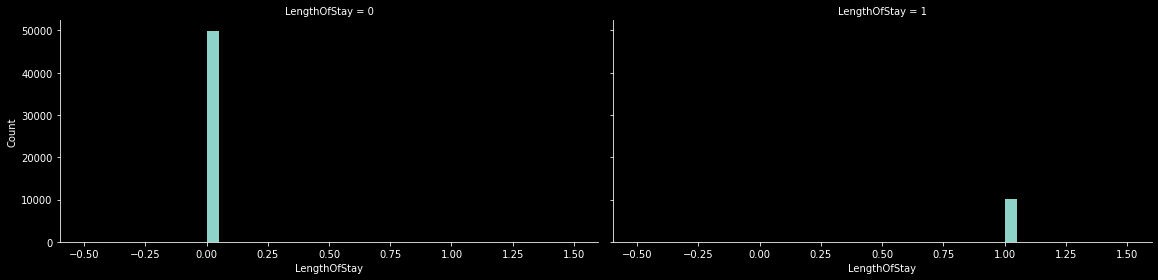

In [9]:
Facet_Grid_sns(train_data)

### 3.2 Split into X and y

In [10]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


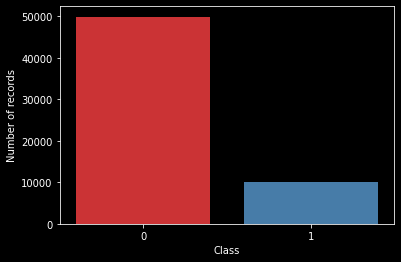

In [11]:
sns.countplot(y, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

## 4. Encode data with OneHotEncoder

In [12]:
X_copy = X.copy()
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']

for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])
    X_copy = pd.concat([X_copy, dummy], axis=1)
#     if col == 'TypeOfAdmission':
#         missing_type = ["Trauma","Not Available"]
#         for t in missing_type:
#             if t not in X_copy.columns:
#                 X[t] = 0
#         X_copy = X_copy.drop(col, axis=1)
#     else:
    X_copy = X_copy.drop(col, axis=1)

# For the "TypeOfAdmission" must have "Trauma" and "Not Available" for future prediction


# Check X_copy
X_copy.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',                         'F',
                               'M',                         'U',
          'Black/African American',              'Multi-racial',
                      'Other Race',                     'White',
                        'Elective',                 'Emergency',
                         'Newborn',                    'Urgent',
                                -1,                           0,
                               115,                         216,
                               220,                         228,
                               231,    'Blue Cross/Blue Shield',
          'Federal/State/Local/VA', 'Managed Care, Unspecified',
                        'Medicaid',                  'Medicare',
             'Miscellaneo

### 4.1 Plot heatmap for correlations (encoded data)

<AxesSubplot:>

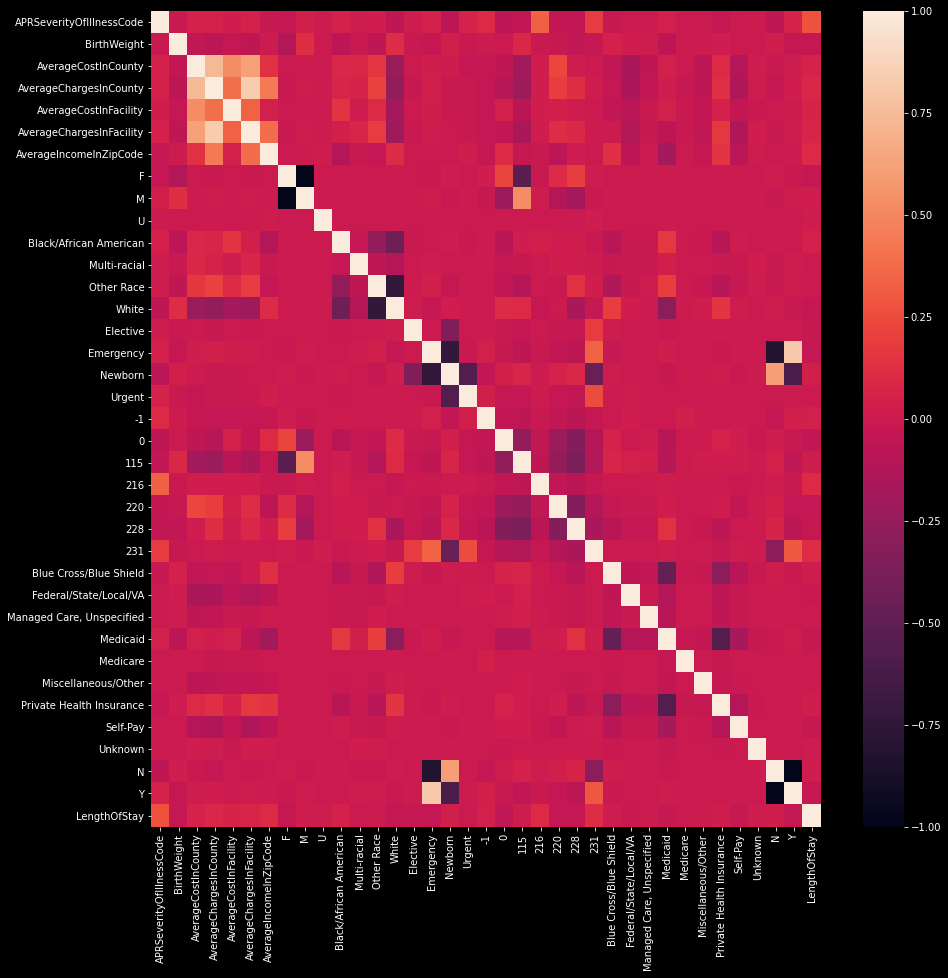

In [13]:
tmp = pd.concat([X_copy, y], axis=1)
correlations = tmp.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(correlations, ax = ax)

## 5. Split data into training and testing set

### 5.1 Split dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, stratify=y)

In [15]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,U,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
50483,2,3500,3155,11381,4980,9323,74,0,1,0,...,0,0,0,0,0,1,0,0,1,0
27590,1,4000,3155,11381,5826,15680,45,1,0,0,...,0,0,0,0,0,0,0,0,1,0
27313,1,2800,2611,9227,3607,7297,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
13878,2,3700,3155,11381,3032,10135,81,1,0,0,...,0,0,0,0,0,0,0,0,1,0
31101,2,3300,2158,4620,1707,4630,53,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,1,3200,2785,10644,2669,12893,96,1,0,0,...,0,0,1,0,0,0,0,0,1,0
11840,1,3000,2158,4620,2779,3978,56,1,0,0,...,0,0,0,0,0,0,0,0,1,0
48231,1,3100,2611,9227,1751,8951,45,1,0,0,...,0,0,0,0,0,1,0,0,1,0
57668,1,3600,2785,10644,3911,11059,77,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 5.2 Reset index

In [16]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [17]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,U,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
0,2,3500,3155,11381,4980,9323,74,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1,4000,3155,11381,5826,15680,45,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2800,2611,9227,3607,7297,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,3700,3155,11381,3032,10135,81,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,3300,2158,4620,1707,4630,53,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41971,1,3200,2785,10644,2669,12893,96,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41972,1,3000,2158,4620,2779,3978,56,1,0,0,...,0,0,0,0,0,0,0,0,1,0
41973,1,3100,2611,9227,1751,8951,45,1,0,0,...,0,0,0,0,0,1,0,0,1,0
41974,1,3600,2785,10644,3911,11059,77,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## 6. Scale data

### 6.1 StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_transform, y_train_ravel)

LogisticRegression(random_state=0)

In [20]:
from sklearn import metrics 

y_pred_logistic = logistic.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 83.84%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     14969
           1       0.58      0.14      0.22      3021

    accuracy                           0.84     17990
   macro avg       0.71      0.56      0.56     17990
weighted avg       0.80      0.84      0.79     17990



## 8. Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_ravel)

GaussianNB()

In [24]:
y_pred_naive = gnb.predict(X_test)

print('Naive Bayes')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_naive) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_naive))

Naive Bayes
Accuracy: 81.6%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14969
           1       0.44      0.34      0.38      3021

    accuracy                           0.82     17990
   macro avg       0.66      0.63      0.64     17990
weighted avg       0.80      0.82      0.81     17990



## 9. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.77%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14969
           1       0.34      0.29      0.31      3021

    accuracy                           0.79     17990
   macro avg       0.60      0.59      0.59     17990
weighted avg       0.77      0.79      0.78     17990



## 10 Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

Rclf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
Rclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
y_pred_forest = clf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 78.77%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14969
           1       0.34      0.29      0.31      3021

    accuracy                           0.79     17990
   macro avg       0.60      0.59      0.59     17990
weighted avg       0.77      0.79      0.78     17990



## 11 XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [29]:
# hyperParameterTuning(X_train,y_train_ravel)

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic')
xgb.fit(X_train, y_train_ravel)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_xgb = xgb.predict(X_test)

print('XGBoostClassifier')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_xgb) * 100, 2)))
print(metrics.classification_report(y_test, y_xgb))

XGBoostClassifier
Accuracy: 84.57%
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     14969
           1       0.64      0.19      0.29      3021

    accuracy                           0.85     17990
   macro avg       0.75      0.58      0.60     17990
weighted avg       0.82      0.85      0.81     17990



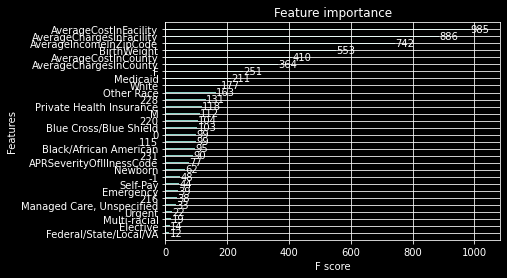

<Figure size 3600x3600 with 0 Axes>

In [61]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features = 30)
plt.figure(figsize=(50,50))
plt.show()

## 12 Apply on Test dataset

In [51]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [62]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   35471  51.28%
F   33704  48.72%
U       2    0.0%
--------------------------------
Race
                        Counts Percent
White                    30432  43.99%
Other Race               27043  39.09%
Black/African American   10780  15.58%
Multi-racial               922   1.33%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     68125  98.48%
Emergency     495   0.72%
Urgent        362   0.52%
Elective      194   0.28%
Trauma          1    0.0%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   24212   35.0%
 0     15120  21.86%
 220   13108  18.95%
 115   12819  18.53%
 231    2535   3.66%
 216     764    1.1%
-1       619   0.89%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   55243  79.86%
2   10935  15.81%
3    2998   4.33%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                  

In [63]:
test_copy = test_data.copy()
# encode_col = ['Gender', 
#               'Race', 
#               'TypeOfAdmission', 
#               'CCSProcedureCode',
#               'PaymentTypology', 
#               'EmergencyDepartmentIndicator']
test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")


for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
#     if col == 'TypeOfAdmission':
#         missing_type = ["Trauma","Not Available"]
#         for t in missing_type:
#             if t not in test_copy.columns:
#                 test_copy[t] = 0
#         test_copy = test_copy.drop(col, axis=1)
#     else:
    test_copy = test_copy.drop(col, axis=1)

test_copy = test_copy.drop(['Trauma'], axis = 1)
# Check X_copy
test_copy.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',                         'F',
                               'M',                         'U',
          'Black/African American',              'Multi-racial',
                      'Other Race',                     'White',
                        'Elective',                 'Emergency',
                         'Newborn',                    'Urgent',
                                -1,                           0,
                               115,                         216,
                               220,                         228,
                               231,    'Blue Cross/Blue Shield',
          'Federal/State/Local/VA', 'Managed Care, Unspecified',
                        'Medicaid',                  'Medicare',
             'Miscellaneo

In [64]:
test_transform = scaler.transform(test_copy)

pred_xgb = xgb.predict(test_copy)
pred_log = logistic.predict(test_transform)

pred_xgb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
u,c = np.unique(pred_xgb, return_counts = True)
u1,c1 = np.unique(pred_log, return_counts = True)
print(dict(zip(u,c)))
print(dict(zip(u1,c1)))

{0: 67386, 1: 1791}
{0: 66988, 1: 2189}


In [66]:
submission['LengthOfStay'] = pd.Series(pred_xgb)

submission.to_csv('test_xgb_3.csv',index=False)